In [1]:
#Import our Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
#Load and read our data
data = pd.read_csv('/content/drive/MyDrive/archive (2)/Midterm_53_group.csv')
data.head()

,Time,Source,No.,Destination,Protocol,Length,Info
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,92,Name query NB WPAD<00>
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,92,Name query NB WPAD<00>
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1


Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394136 entries, 0 to 394135
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         394136 non-null  float64
 1   Source       394136 non-null  object 
 2   No.          394136 non-null  int64  
 3   Destination  394136 non-null  object 
 4   Protocol     394136 non-null  object 
 5   Length       394136 non-null  int64  
 6   Info         394136 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 21.0+ MB


In [4]:
data.describe()

,Time,No.,Length
count,394136.000000,394136.000000,394136.000000
mean,781.599378,197068.500000,985.577027
std,263.603332,113777.407186,837.371336
min,0.000000,1.000000,42.000000
25%,558.184351,98534.750000,60.000000
50%,781.926020,197068.500000,1462.000000
75%,986.280803,295602.250000,1514.000000
max,1256.922008,394136.000000,49745.000000


In [34]:
#missing data
data.isna().sum()

Time           0
Source         0
Destination    0
Protocol       0
Length         0
dtype: int64

<Axes: >

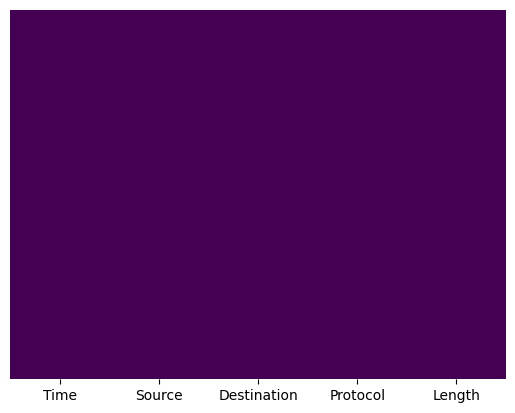

In [35]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
data['Protocol'].describe()

count     394136
unique        16
top          TCP
freq      314873
Name: Protocol, dtype: object

<Axes: xlabel='Protocol', ylabel='count'>

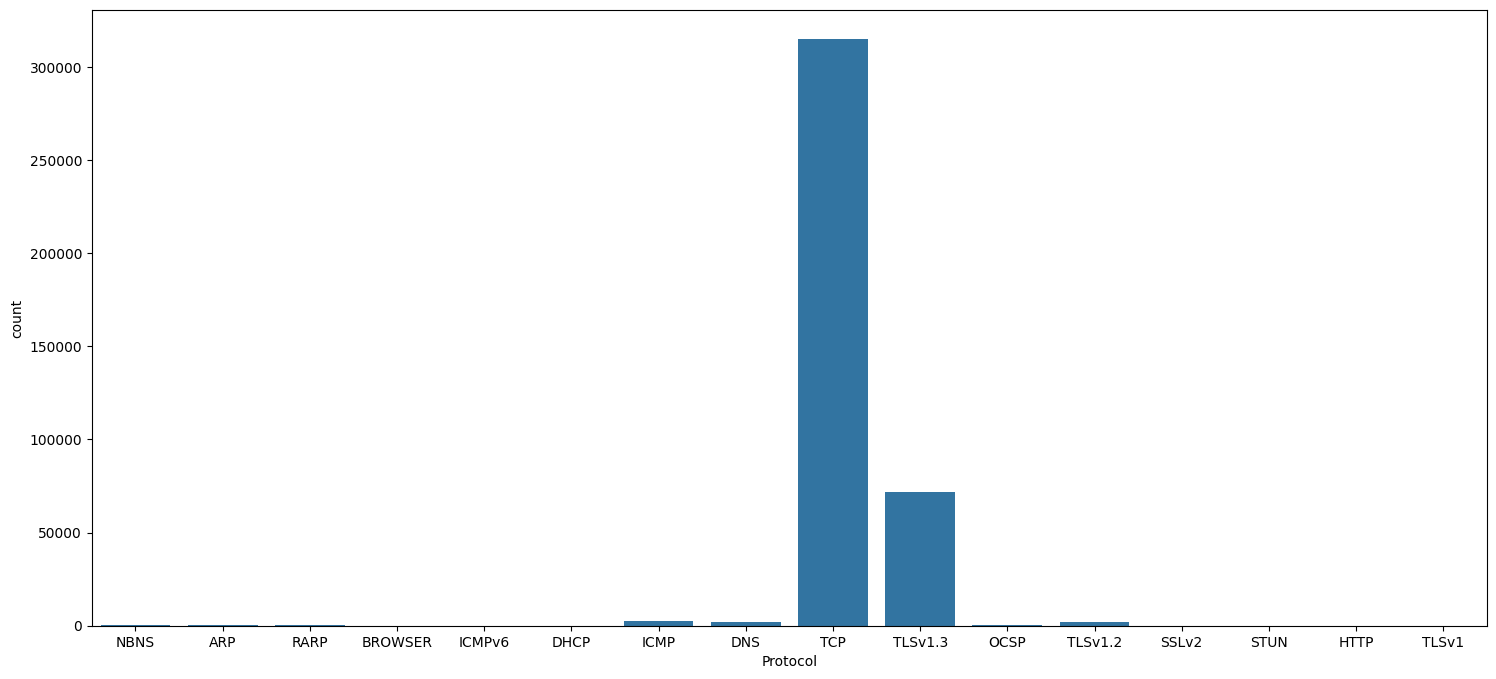

In [6]:
#Network Protocol Count graph
plt.figure(figsize=(18,8))
sns.countplot(x='Protocol', data=data)

In [7]:
data['Source'].value_counts()

Source
192.167.7.162                116067
104.91.166.75                 57238
74.125.9.169                  37085
23.33.29.79                   25918
173.194.133.202               22832
                              ...  
fe80::df29:ec4d:6922:c82f         1
13.56.23.36                       1
fe80::9abc:585:27a6:3cff          1
fe80::f326:c8c2:4e4e:9fbc         1
192.167.7.160                     1
Name: count, Length: 372, dtype: int64

In [8]:
#Source and destination IP address count
print(f'unique source IP addresses: {data.Source.nunique()}')
print(f'unique Destination IP addresses: {data.Destination.nunique()}')

unique source IP addresses: 372
unique Destination IP addresses: 308


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394136 entries, 0 to 394135
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         394136 non-null  float64
 1   Source       394136 non-null  object 
 2   No.          394136 non-null  int64  
 3   Destination  394136 non-null  object 
 4   Protocol     394136 non-null  object 
 5   Length       394136 non-null  int64  
 6   Info         394136 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 21.0+ MB


In [10]:
data['No.'].nunique()

394136

In [11]:
#Dropping the "No." column
data.drop("No.", axis=1, inplace=True)
data.head()

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,192.167.8.166,192.167.255.255,NBNS,92,Name query NB WPAD<00>
1,0.784682,192.167.8.166,192.167.255.255,NBNS,92,Name query NB WPAD<00>
2,1.169060,VMware_8a:5c:e6,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,VMware_8a:5c:e6,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,VMware_8a:5c:e6,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1


In [12]:
data['Info'].nunique()

316837

In [13]:
#dropping the 'Info' column
data.drop("Info", axis=1, inplace=True)
data.head()

,Time,Source,Destination,Protocol,Length
0,0.000000,192.167.8.166,192.167.255.255,NBNS,92
1,0.784682,192.167.8.166,192.167.255.255,NBNS,92
2,1.169060,VMware_8a:5c:e6,Broadcast,ARP,60
3,2.167949,VMware_8a:5c:e6,Broadcast,ARP,60
4,3.170095,VMware_8a:5c:e6,Broadcast,ARP,60


<Figure size 1800x800 with 0 Axes>

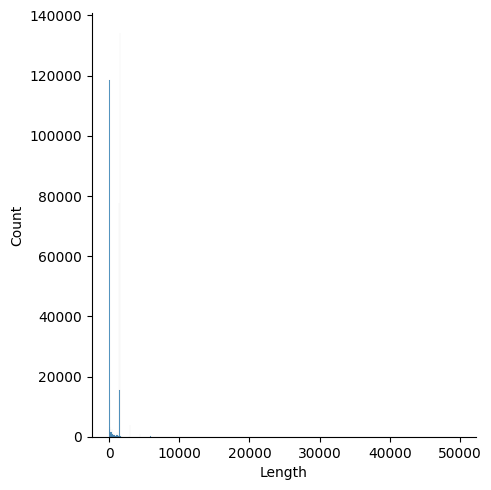

In [14]:
#plotting a distribution of our 'Length' column
plt.figure(figsize=(18,8))
sns.displot(x='Length',data=data)

In [15]:
data['Length'].value_counts()

Length
1514     131764
54        93664
1462      59327
60        20228
1466      17485
          ...  
2453          1
2633          1
3353          1
10782         1
2232          1
Name: count, Length: 2044, dtype: int64

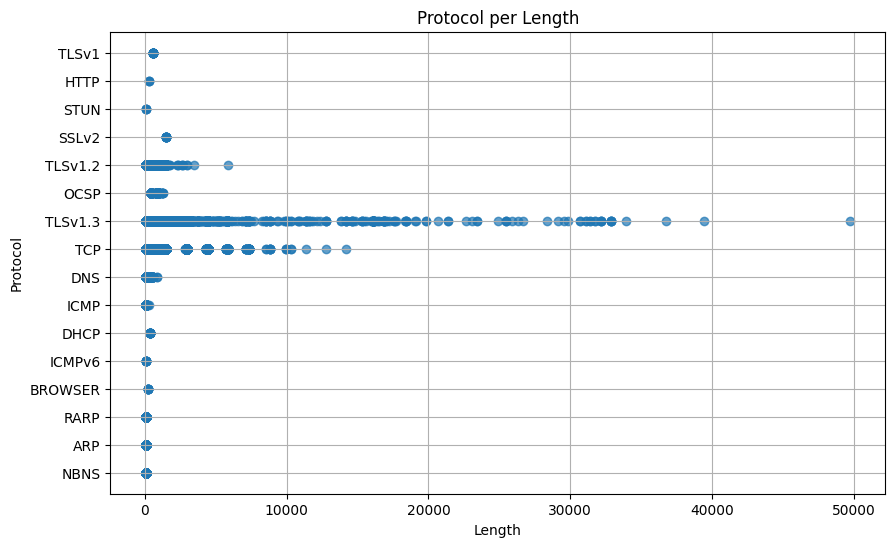

In [16]:
# Create a scatter plot of Length per Protocol
plt.figure(figsize=(10, 6))   # Set figure size
plt.scatter(data['Length'], data['Protocol'], alpha=0.7)

# Adding titles and labels
plt.title('Protocol per Length')
plt.xlabel('Length')
plt.ylabel('Protocol')

# Show grid for better readability
plt.grid()

plt.show()

Data Preprocessing

In [17]:
data.head()

,Time,Source,Destination,Protocol,Length
0,0.000000,192.167.8.166,192.167.255.255,NBNS,92
1,0.784682,192.167.8.166,192.167.255.255,NBNS,92
2,1.169060,VMware_8a:5c:e6,Broadcast,ARP,60
3,2.167949,VMware_8a:5c:e6,Broadcast,ARP,60
4,3.170095,VMware_8a:5c:e6,Broadcast,ARP,60


In [18]:
#Encoding our ['Source', 'Destination', 'Protocol'] column
le = LabelEncoder()

data["Source"] = le.fit_transform(data["Source"])
data["Destination"] = le.fit_transform(data["Destination"])
data["Protocol"] = le.fit_transform(data["Protocol"])
data.head()

,Time,Source,Destination,Protocol,Length
0,0.000000,183,152,7,92
1,0.784682,183,152,7,92
2,1.169060,347,303,0,60
3,2.167949,347,303,0,60
4,3.170095,347,303,0,60


In [19]:
#converting our Length data to a Float
data['Length'] = data['Length'] * 1.0
data.head()

,Time,Source,Destination,Protocol,Length
0,0.000000,183,152,7,92.0
1,0.784682,183,152,7,92.0
2,1.169060,347,303,0,60.0
3,2.167949,347,303,0,60.0
4,3.170095,347,303,0,60.0


In [20]:
#Taking a portion of our sample data
data = data.sample(n=10000)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 249540 to 370374
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         10000 non-null  float64
 1   Source       10000 non-null  int64  
 2   Destination  10000 non-null  int64  
 3   Protocol     10000 non-null  int64  
 4   Length       10000 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 468.8 KB


In [21]:
#Splitting our data into Train and Test set
X = data.drop('Length', axis=1)
y = data['Length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



#Scaling our data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6700, 4) (6700,) (3300, 4) (3300,)


In [28]:
#creating a Random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [29]:
#Training and taking our model prediction
model.fit(X_train, y_train)
rfr_pred = model.predict(X_test)

In [30]:
#our model evaluation
print(mean_squared_error(y_test,rfr_pred))
print(mean_absolute_error(y_test,rfr_pred))
print(r2_score(y_test,rfr_pred))

139910.98653637848
117.47989631313132
0.7429965406928574


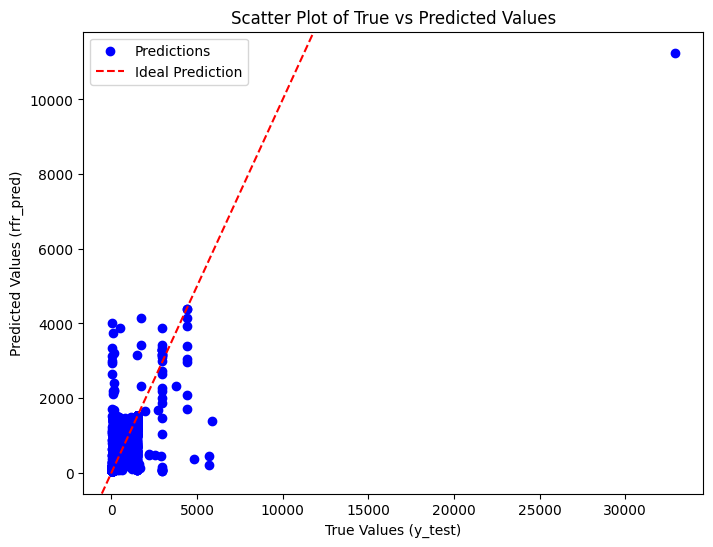

In [25]:
#plotting our model evaluation
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(y_test, rfr_pred, color='blue', label='Predictions', marker='o')

plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (rfr_pred)')
plt.title('Scatter Plot of True vs Predicted Values')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Ideal Prediction') # Optional line for ideal prediction
plt.legend()

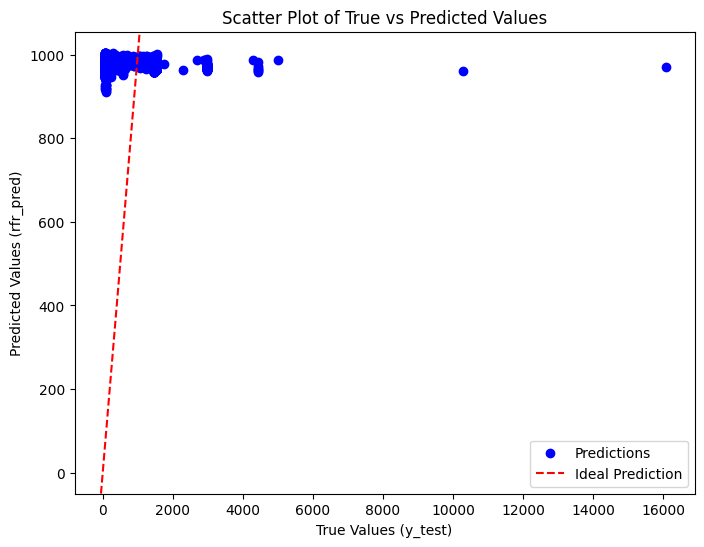

In [38]:
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(y_test, y_pred, color='blue', label='Predictions', marker='o')

plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (rfr_pred)')
plt.title('Scatter Plot of True vs Predicted Values')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Ideal Prediction') # Optional line for ideal prediction
plt.legend()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Define the kernel functions
kernels = [
    C(1.0, (1e-3, 1e3)) * Matern(length_scale=[1.0], nu=2.5),
    C(1.0, (1e-3, 1e3)) * RBF(length_scale=[1.0]),
]

# Define the noise levels
noise_levels = [0.1, 0.5, 1.0]

# Evaluate the GP model with varying noise levels
for kernel in kernels:
    for noise_level in noise_levels:
        # Add noise to the training data
        y_train_noisy = y_train + np.random.normal(0, noise_level, size=len(y_train))

        # Create and train the GP model
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
        gp.fit(X_train, y_train_noisy)

        # Make predictions on the test data
        y_pred, y_std = gp.predict(X_test, return_std=True)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Kernel: {kernel}, Noise Level: {noise_level:.2f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: 1**2 * Matern(length_scale=1, nu=2.5), Noise Level: 0.10, MSE: 2922675619.5808, MAE: 1802.8945


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: 1**2 * Matern(length_scale=1, nu=2.5), Noise Level: 0.50, MSE: 2930426126.6213, MAE: 1811.8604


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: 1**2 * Matern(length_scale=1, nu=2.5), Noise Level: 1.00, MSE: 2929418135.2704, MAE: 1828.2280


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: 1**2 * RBF(length_scale=1), Noise Level: 0.10, MSE: 81804747243.7361, MAE: 7719.4201


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: 1**2 * RBF(length_scale=1), Noise Level: 0.50, MSE: 81808474346.0252, MAE: 8016.7231


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: 1**2 * RBF(length_scale=1), Noise Level: 1.00, MSE: 82485147538.9442, MAE: 8790.0698


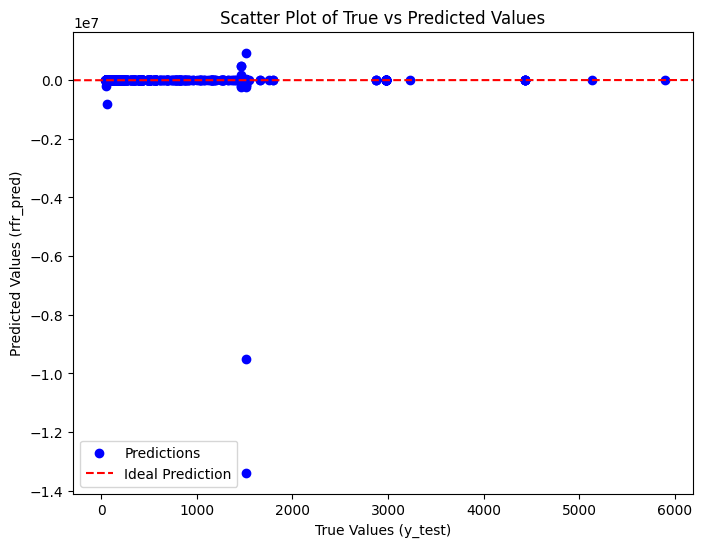

In [25]:
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(y_test, y_pred, color='blue', label='Predictions', marker='o')

plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of True vs Predicted Values')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Ideal Prediction') # Optional line for ideal prediction
plt.legend()

In [33]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

82485147538.94423
8790.069785194824


In [31]:
#saving our models
import pickle


# Use 'wb' to write binary data
with open('gp.pkl', 'wb') as f:
    pickle.dump(gp, f)

with open('rfr_model.pkl', 'wb') as r:
    pickle.dump(model, r)